# Zadania do tematu "Wzmocnienie gradientowe (Gradient Boosting)"

W tym Notebooku znajdują się zadania do tematu "Wzmocnienie gradientowe (Gradient Boosting)", które mają na celu pokazać podstawy implementacji algorytmów wzmocnienia gradientowego.

# Zbiór danych

Będziemy korzystać ze zbioru danych "F1 Race Results", który utworzony został na podstawie danych dostępnych na [Ergast](https://ergast.com/mrd/). Na podstawie dostępnych danych dodane zostały nowe kolumny. Dane można pobrać z folderu z zadaniami `Tasks`, z podfolderu `dane` (plik `f1_race_results.csv`).

Opis poszczególnych kolumn:
- `Year` - sezon, w którym odbywał się dany wyścig,
- `Round` - numer rundy w danym sezonie,
- `Date` - data wyścigu,
- `Circuit` - nazwa toru,
- `Country` - nazwa państwa, w którym organizowany był wyścig,
- `Driver` - imię i nazwisko kierowcy,
- `Driver ID` - ID kierowcy (unikalna nazwa),
- `Nationality`	- narodowość kierowcy,
- `Team` - nazwa zespołu, dla którego dany kierowca jechał,
- `Position` - zajęta pozycja w wyścigu,
- `Points` - liczba zdobytych punktów,
- `Age` - wiek w dni wyścigu (w latach),
- `Grid Position` - pozycja startowa,
- `Fastest Lap Time` - czas najszybszego okrążenia w wyścigu uzyskany przez danego kierowcę,
- `Fastest Lap Rank` - "pozycja" najszybszego okrążenia danego kierowcy w porównaniu z najszybszymi okrążeniami innych kierowców,
- `Sprint Race` - informacja czy był to sprint,
- `Seasonal Driver Standing Before The Race` - pozycja kierowcy w klasyfikacji generalnej przed wyścigiem,
- `Seasonal Driver Standing After The Race` - pozycja kierowcy w klasyfikacji generalnej po wyścigu,
- `Seasonal Average Position Before The Race` - średnia pozycja w wyścigach w tym sezonie,
- `Seasonal Average Grid Position Before The Race` - średnia pozycja startowa w tym sezonie,
- `Seasonal Average Points Before The Race` - średnia liczba punktów zdobywanych w wyścigach w tym sezonie,
- `Seasonal Wins Before The Race` - liczba wygranych w sezonie,
- `Seasonal Average Fastest Lap Rank Before The Race` - średnia "pozycja" najszybszego okrążenia danego kierowcy w porównaniu z najszybszymi okrążeniami innych kierowców,
- `Seasonal Driver Standing Before The Race with Sprints` - pozycja kierowcy w klasyfikacji generalnej przed wyścigiem z uwzględnieniem sprintów,
- `Seasonal Driver Standing After The Race with Sprints` - pozycja kierowcy w klasyfikacji generalnej po wyścigu z uwzględnieniem sprintów,
- `Seasonal Average Position Before The Race with Sprints` - średnia pozycja w wyścigach w tym sezonie z uwzględnieniem sprintów,
- `Seasonal Average Grid Position Before The Race with Sprints` - średnia pozycja startowa w wyścigach w tym sezonie z uwzględnieniem sprintów,
- `Seasonal Average Points Before The Race with Sprints` - średnia liczba punktów w wyścigach w tym sezonie z uwzględnieniem sprintów,
- `Seasonal Wins Before The Race with Sprints` - liczba wygranych w sezonie z uwzględnieniem sprintów,
- `Seasonal Constructor Standing Before The Race` - pozycja zespołu w klasyfikacji konstruktorów przed wyścigiem,
- `Seasonal Constructor Standing After The Race` - pozycja zespołu w klasyfikacji konstruktorów po wyścigu,
- `Seasonal Constructor Standing Before The Race with Sprints` - pozycja zespołu w klasyfikacji konstruktorów przed wyścigiem z uwzględnieniem sprintów,
- `Seasonal Constructor Standing After The Race with Sprints` - pozycja zespołu w klasyfikacji konstruktorów po wyścigu,
- `Seasonal Constructor Average Position Before The Race` - średnia pozycja zespołu w wyścigach w tym sezonie,
- `Seasonal Constructor Average Grid Position Before The Race` - średnia pozycja startowa zespołu w wyścigach w tym sezonie,
- `Seasonal Constructor Average Position Before The Race with Sprints` - średnia pozycja startowa zespołu w wyścigach w tym sezonie z uwzględnieniem sprintów,
- `Seasonal Constructor Average Grid Position Before The Race with Sprints` - średnia pozycja startowa zespołu w wyścigach w tym sezonie z uwzględnieniem sprintów,
- `Career Races Before The Race` - liczba wyścigów, w których kierowca wystartował w całej karierze,
- `Career Races On The Track Before The Race` - liczba wyścigów na danym torze, w których kierowca wystartował w całej karierze,
- `Career Wins Before The Race` - liczba wygranych wyścigów w karierze,
- `Career Average Position Before The Race` - średnia pozycja, którą kierowca zajmował w wyścigach w karierze,
- `Career Average Grid Position Before the Race` - średnia pozycja startowa, którą kierowca zajmował w karierze,
- `Career Average Fastest Lap Rank Before The Race` - średnia "pozycja" najszybszego okrążenia danego kierowcy w porównaniu z najszybszymi okrążeniami innych kierowców w karierze,
- `Career Wins Before The Race with Sprints` - liczba wygranych wyścigów w karierze z uwzględnieniem sprintów,
- `Career Average Position Before The Race with Sprints` - średnia pozycja, którą kierowca zajmował w wyścigach w karierze,
- `Career Average Grid Position Before The Race with Sprints` - średnia pozycja startowa, którą kierowca zajmował w karierze,


Na potrzeby przyjmiemy, że chcemy robić predykcję pozycji, którą kierowca zdobył w wyścigu (kolumna 'Position').

> **📌 Ważne**
>
> Dla pierwszych wyścigów w każdym roku (poza 1950) statystyki sezonowe są wyliczone na podstawie całego **poprzedniego** sezonu!



# 1. Wczytaj dane z pliku do postaci `pandas DataFrame`. Następnie wykorzystaj `head()`, żeby wyświetlić pierwsze 5 wierszy.

**Podpowiedź:** wykorzystaj `pd.set_option('display.max_columns', None)`, żeby wyświetlać dane z wszystkich kolumn.

In [37]:
# Wpisz swój kod poniżej
import pandas as pd
df = pd.read_csv('f1_race_results.csv')
df.head()

<ipython-input-37-3ee3a9624c34>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('f1_race_results.csv')


,Year,Round,Date,Circuit,Country,Driver,Driver ID,Nationality,Team,Position,Points,Age,Grid Position,Fastest Lap Time,Fastest Lap Rank,Sprint Race,Seasonal Driver Standing Before The Race,Seasonal Driver Standing After The Race,Seasonal Average Position Before The Race,Seasonal Average Grid Position Before The Race,Seasonal Average Points Before The Race,Seasonal Wins Before The Race,Seasonal Average Fastest Lap Rank Before The Race,Seasonal Driver Standing Before The Race with Sprints,Seasonal Driver Standing After The Race with Sprints,Seasonal Average Position Before The Race with Sprints,Seasonal Average Grid Position Before The Race with Sprints,Seasonal Average Points Before The Race with Sprints,Seasonal Wins Before The Race with Sprints,Seasonal Constructor Standing Before The Race,Seasonal Constructor Standing After The Race,Seasonal Constructor Standing Before The Race with Sprints,Seasonal Constructor Standing After The Race with Sprints,Seasonal Constructor Average Position Before The Race,Seasonal Constructor Average Grid Position Before The Race,Seasonal Constructor Average Position Before The Race with Sprints,Seasonal Constructor Average Grid Position Before The Race with Sprints,Career Races Before The Race,Career Races On The Track Before The Race,Career Wins Before The Race,Career Average Position Before The Race,Career Average Grid Position Before the Race,Career Average Fastest Lap Rank Before The Race,Career Wins Before The Race with Sprints,Career Average Position Before The Race with Sprints,Career Average Grid Position Before The Race with Sprints
0,1950,1,1950-05-13,Silverstone Circuit,UK,Nino Farina,farina,Italian,Alfa Romeo,1,9.0,43,1,NaN,NaN,False,0,1,0.0,0.0,0.0,0,0.0,0,1,0.0,0.0,0.0,0,0,1,0,1,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN
1,1950,1,1950-05-13,Silverstone Circuit,UK,Luigi Fagioli,fagioli,Italian,Alfa Romeo,2,6.0,51,2,NaN,NaN,False,0,2,0.0,0.0,0.0,0,0.0,0,2,0.0,0.0,0.0,0,0,1,0,1,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN
2,1950,1,1950-05-13,Silverstone Circuit,UK,Reg Parnell,reg_parnell,British,Alfa Romeo,3,4.0,38,4,NaN,NaN,False,0,3,0.0,0.0,0.0,0,0.0,0,3,0.0,0.0,0.0,0,0,1,0,1,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN
3,1950,1,1950-05-13,Silverstone Circuit,UK,Yves Cabantous,cabantous,French,Talbot-Lago,4,3.0,45,6,NaN,NaN,False,0,4,0.0,0.0,0.0,0,0.0,0,4,0.0,0.0,0.0,0,0,2,0,2,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN
4,1950,1,1950-05-13,Silverstone Circuit,UK,Louis Rosier,rosier,French,Talbot-Lago,5,2.0,44,9,NaN,NaN,False,0,5,0.0,0.0,0.0,0,0.0,0,5,0.0,0.0,0.0,0,0,2,0,2,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,NaN,NaN


# 2. Wyświetl typy danych w każdej kolumnie oraz statystyki poszczególnych kolumn i liczbę brakujących wartości w każdej kolumnie.

In [38]:
# Wpisz swój kod poniżej
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26586 entries, 0 to 26585
Data columns (total 46 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Year                                                                     26586 non-null  int64  
 1   Round                                                                    26586 non-null  int64  
 2   Date                                                                     26586 non-null  object 
 3   Circuit                                                                  26586 non-null  object 
 4   Country                                                                  26586 non-null  object 
 5   Driver                                                                   26586 non-null  object 
 6   Driver ID                                                             

In [39]:
df.isnull().sum()

,0
Year,0
Round,0
Date,0
Circuit,0
Country,0
Driver,0
Driver ID,0
Nationality,0
Team,0
Position,0


Statystyki z najszybszymi okrążeniami dostępne były dla wyścigów od sezonu 2004. Przez to brakuje tej informacji dla większości wyścigów.

# 3. Utwórz nowy DataFrame, w którym będą poniższe kolumny. Następnie odrzuć sprinty (wyścigi, które mają `True` w kolumnie `"Sprint Race"`) i wiersze z brakującymi danymi w kolumnach `"Seasonal Average Position Before The Race"`, `"Seasonal Constructor Average Position Before The Race"` i `"Career Average Position Before The Race"`.

```Python
columns_to_use = ["Year",
                  "Round",
                  "Driver",
                  "Position",
                  "Age",
                  "Grid Position",
                  "Sprint Race",
                  "Seasonal Driver Standing Before The Race",
                  "Seasonal Average Position Before The Race",
                  "Seasonal Average Grid Position Before The Race",
                  "Seasonal Wins Before The Race",
                  "Seasonal Constructor Standing Before The Race",
                  "Seasonal Constructor Average Position Before The Race",
                  "Seasonal Constructor Average Grid Position Before The Race",
                  "Career Races Before The Race",
                  "Career Races On The Track Before The Race",
                  "Career Wins Before The Race",
                  "Career Average Position Before The Race",
                  "Career Average Grid Position Before the Race"
                  ]
```

In [40]:
# Wpisz swój kod poniżej

columns_to_use = ["Year",
                  "Round",
                  "Driver",
                  "Position",
                  "Age",
                  "Grid Position",
                  "Sprint Race",
                  "Seasonal Driver Standing Before The Race",
                  "Seasonal Average Position Before The Race",
                  "Seasonal Average Grid Position Before The Race",
                  "Seasonal Wins Before The Race",
                  "Seasonal Constructor Standing Before The Race",
                  "Seasonal Constructor Average Position Before The Race",
                  "Seasonal Constructor Average Grid Position Before The Race",
                  "Career Races Before The Race",
                  "Career Races On The Track Before The Race",
                  "Career Wins Before The Race",
                  "Career Average Position Before The Race",
                  "Career Average Grid Position Before the Race"
                  ]

df_new = df[columns_to_use]
df_new = df_new[df_new['Sprint Race'] == False]
df_new = df_new.dropna(subset=['Seasonal Average Position Before The Race', "Seasonal Constructor Average Position Before The Race", "Career Average Position Before The Race"])
df_new.head()

,Year,Round,Driver,Position,Age,Grid Position,Sprint Race,Seasonal Driver Standing Before The Race,Seasonal Average Position Before The Race,Seasonal Average Grid Position Before The Race,Seasonal Wins Before The Race,Seasonal Constructor Standing Before The Race,Seasonal Constructor Average Position Before The Race,Seasonal Constructor Average Grid Position Before The Race,Career Races Before The Race,Career Races On The Track Before The Race,Career Wins Before The Race,Career Average Position Before The Race,Career Average Grid Position Before the Race
23,1950,2,Juan Fangio,1,38,1,False,13,12.0,3.0,0,1,4.500000,2.5,1,0,0,12.0,3.0
25,1950,2,Louis Chiron,3,50,8,False,19,18.0,11.0,0,4,13.285714,14.0,1,0,0,18.0,11.0
27,1950,2,Prince Bira,5,35,15,False,15,14.0,5.0,0,4,13.285714,14.0,1,0,0,14.0,5.0
28,1950,2,Bob Gerard,6,36,16,False,6,6.0,13.0,0,3,14.800000,12.0,1,0,0,6.0,13.0
29,1950,2,Johnny Claes,7,33,19,False,12,11.0,21.0,0,2,9.400000,11.4,1,0,0,11.0,21.0


# 4. Podziel dane na zbiór treningowy, walidacyjny i testowy w stosunku 80:10:10. Wykorzystaj `random_state = 42`

In [41]:
# Wpisz swój kod poniżej
from sklearn.model_selection import train_test_split

df_train, df_test_temp = train_test_split(df_new, test_size=0.2, random_state=42)
df_test, df_val = train_test_split(df_test_temp, test_size=0.5, random_state=42)

# 5. Utwórz i wyświetl macierz korelacji dla zbioru treningowego (uwzględnij pozycję uzyskaną w wyścigu).

Wykorzystaj kolumny:
```Python
columns_for_correlation_matrix = ["Position",
                                  "Year",
                                  "Round",
                                  "Age",
                                  "Grid Position",
                                  "Seasonal Driver Standing Before The Race",
                                  "Seasonal Average Position Before The Race",
                                  "Seasonal Average Grid Position Before The Race",
                                  "Seasonal Wins Before The Race",
                                  "Seasonal Constructor Standing Before The Race",
                                  "Seasonal Constructor Average Position Before The Race",
                                  "Seasonal Constructor Average Grid Position Before The Race",
                                  "Career Races Before The Race",
                                  "Career Races On The Track Before The Race",
                                  "Career Wins Before The Race",
                                  "Career Average Position Before The Race",
                                  "Career Average Grid Position Before the Race"]
```

Do utworzenia macierzy korelacji możesz wykorzystać `dataframe_name.corr()`, a do wyświetlenia `heatmap` z biblioteki seaborn.

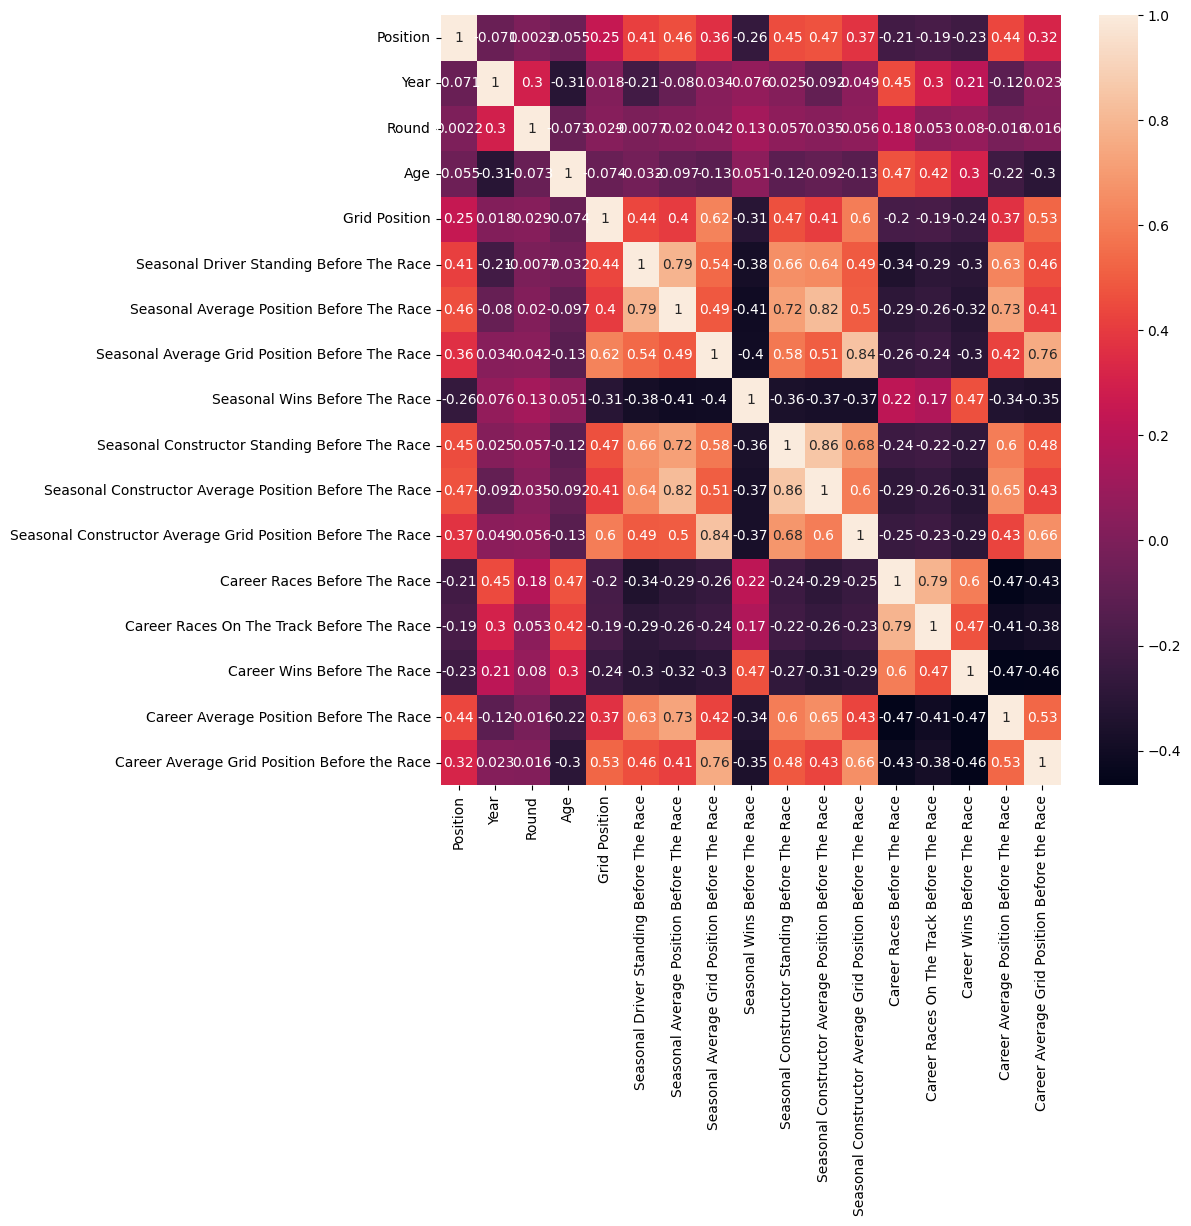

In [42]:
# Wpisz swój kod poniżej
from matplotlib import pyplot as plt
import seaborn as sns

columns_for_correlation_matrix = ["Position",
                                  "Year",
                                  "Round",
                                  "Age",
                                  "Grid Position",
                                  "Seasonal Driver Standing Before The Race",
                                  "Seasonal Average Position Before The Race",
                                  "Seasonal Average Grid Position Before The Race",
                                  "Seasonal Wins Before The Race",
                                  "Seasonal Constructor Standing Before The Race",
                                  "Seasonal Constructor Average Position Before The Race",
                                  "Seasonal Constructor Average Grid Position Before The Race",
                                  "Career Races Before The Race",
                                  "Career Races On The Track Before The Race",
                                  "Career Wins Before The Race",
                                  "Career Average Position Before The Race",
                                  "Career Average Grid Position Before the Race"]
corr_matrix = df_train[columns_for_correlation_matrix].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Czy widzisz jakieś ciekawe/zaskakujące związki pomiędzy poszczególnymi kolumnami?

Które kolumny są najbardziej skorelowane z pozycją zajętą w wyścigu przez kierowcę? Pamiętaj, że wartość ujemna w macierzy korelacji nie oznacza braku korelacji, a po prostu zależność, w której wzrost jednej wartości powoduje spadek drugiej.

# 6. Oddziel kolumnę `"Position"` od każdego zbioru i zapisz ją do `y_train`, `y_val` i `y_test`. Pamiętaj, żeby po utworzeniu nowych zmiennych usunąć też tę kolumnę z wcześniejszych zmiennych.

In [43]:
# Wpisz swój kod poniżej
y_train = df_train['Position']
y_val = df_val['Position']
y_test = df_test['Position']

X_train = df_train.drop('Position', axis=1)
X_val = df_val.drop('Position', axis=1)
X_test = df_test.drop('Position', axis=1)

# 7. Przed implementacją Gradient Boostingu utwórzmy model drzewa decyzyjnego i losowego lasu, które potraktujemy jako punkt odniesienia. Oblicz wartość błędu MSE dla danych ze zbioru walidacyjnego i testowego. Przyjmijmy, że modele wykorzystają dane z 4 kolumn:

```Python
columns_for_model = ["Seasonal Average Position Before The Race",
                     "Seasonal Constructor Standing Before The Race",
                     "Seasonal Constructor Average Position Before The Race",
                     "Career Average Position Before The Race"]
```

**Ustaw `random_state = 42`**

In [58]:
# Wpisz swój kod poniżej
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

columns_for_model = ["Seasonal Average Position Before The Race",
                     "Seasonal Constructor Standing Before The Race",
                     "Seasonal Constructor Average Position Before The Race",
                     "Career Average Position Before The Race"]

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train[columns_for_model], y_train)

y_pred_val_dt = model_dt.predict(X_val[columns_for_model])
y_pred_test_dt = model_dt.predict(X_test[columns_for_model])

mse_val_dt = mean_squared_error(y_val, y_pred_val_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)

print(f'MSE for validation set: {mse_val_dt}')
print(f'MSE for test set: {mse_test_dt}')

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train[columns_for_model], y_train)

y_pred_val_rf = model_rf.predict(X_val[columns_for_model])
y_pred_test_rf = model_rf.predict(X_test[columns_for_model])

mse_val_rf = mean_squared_error(y_val, y_pred_val_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

print(f'MSE for validation set: {mse_val_rf}')
print(f'MSE for test set: {mse_test_rf}')

MSE for validation set: 78.53370672097759
MSE for test set: 83.01691116544417
MSE for validation set: 42.12841297049522
MSE for test set: 42.1043471117607


O ile pozycji się średnio myli model? Pamiętaj, że MSE wykorzystuje błąd kwadratowy.

# 8. Zaimplementuj model regresora korzystającego z Gradient Boostingu dostępnego w bibliotece `scikit-learn`. Wykonaj predykcję dla danych ze zbioru walidacyjnego i testowego. Dodaj również pomiar czasu jaki zajmuje nauczenie modelu (ile czasu zajmuje `fit`) - wykorzystaj bibliotekę time i metodę `time()`. Czy błąd MSE jest mniejszy?

**Wykorzystaj te same kolumny co dla drzewa decyzyjnego oraz ustaw `random_state = 42`.**

In [51]:
# Wpisz swój kod poniżej
from sklearn.ensemble import GradientBoostingRegressor
import time

model_gb = GradientBoostingRegressor(random_state=42)
start_time = time.time()
model_gb.fit(X_train[columns_for_model], y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

y_pred_val_gb = model_gb.predict(X_val[columns_for_model])
y_pred_test_gb = model_gb.predict(X_test[columns_for_model])

mse_val_gb = mean_squared_error(y_val, y_pred_val_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)

print(f'MSE for validation set: {mse_val_gb}')
print(f'MSE for test set: {mse_test_gb}')

Training time: 2.195824384689331 seconds
MSE for validation set: 38.067281469435926
MSE for test set: 38.84689843197286


# 9. Teraz zaimplementuj model Gradient boostingu przy pomocy XGBoost. Wykorzystaj te same kolumny, `random_state = 42`, wykonaj pomiar czasu i oblicz błąd MSE.

In [52]:
# Wpisz swój kod poniżej
import xgboost as xgb

model_xgb = xgb.XGBRegressor(random_state=42)
start_time = time.time()
model_xgb.fit(X_train[columns_for_model], y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

y_pred_val_xgb = model_xgb.predict(X_val[columns_for_model])
y_pred_test_xgb = model_xgb.predict(X_test[columns_for_model])

mse_val_xgb = mean_squared_error(y_val, y_pred_val_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

print(f'MSE for validation set: {mse_val_xgb}')
print(f'MSE for test set: {mse_test_xgb}')

Training time: 0.1892092227935791 seconds
MSE for validation set: 41.2835020221187
MSE for test set: 40.40002705372363


Czy widzisz różnicę w czasie potrzebnym na trening modelu?

# 10. Teraz zaimplementuj model Gradient boostingu przy pomocy LightGBM. Wykorzystaj te same kolumny, `random_state = 42`, wykonaj pomiar czasu i oblicz błąd MSE.

In [54]:
# Wpisz swój kod poniżej
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(random_state=42)
start_time = time.time()
model_lgb.fit(X_train[columns_for_model], y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

y_pred_val_lgb = model_lgb.predict(X_val[columns_for_model])
y_pred_test_lgb = model_lgb.predict(X_test[columns_for_model])

mse_val_lgb = mean_squared_error(y_val, y_pred_val_lgb)
mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)

print(f'MSE for validation set: {mse_val_lgb}')
print(f'MSE for test set: {mse_test_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 19632, number of used features: 4
[LightGBM] [Info] Start training from score 12.254432
Training time: 0.442183256149292 seconds
MSE for validation set: 38.51328228922498
MSE for test set: 38.99639726061177


# 11. Jak widzisz wykorzystanie Gradient Boostingu poprawia wyniki, a wykorzystanie bibliotek LightGBM i XGBoost skraca czas obliczeń. Teraz spróbujemy poprawić wyniki poprzez zmianę hiperparametrów. Wykorzystaj przygotowaną siatkę hiperparametrów dla modelu XGBoost oraz `GridSearchCV`, aby znaleźć najlepsze hiperparametry modelu. Wypisz jakie hiperparametry zostały wskazane jako optymalne oraz sprawdź czy błąd MSE dla zbioru walidacyjnego i testowego jest mniejszy.

`GridSearchCV` służy do wyszukiwania najlepszego modelu na podstawie gotowej siatki (stąd nazwa) parametrów. Sprawdza kombinacje wartości poszczególnych parametrów, aby znaleźć te optymalne. Dokumentacja dostępna [tutaj](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html). Jako metrykę ustaw parametr `scoring='neg_mean_squared_error'`.

**UWAGA** `GridSearchCV` sprawdza każdą możliwą kombinację i dlatego może zająć sporo czasu. W parametrach `GridSearchCV` ustaw `cv=3` (jest to liczba cross-walidacji - czyli podziałów danych treningowych na mniejsze części, aby sprawdzić jak model działa dla poszczególnych fragmentów zbioru).

```Python
xgboost_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5]
}
```

In [65]:
# Wpisz swój kod poniżej
from sklearn.model_selection import GridSearchCV

xgboost_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5]
}

model_xgb = xgb.XGBRegressor(random_state=42)

grid_search = GridSearchCV(model_xgb, xgboost_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train[columns_for_model], y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_val_best = best_model.predict(X_val[columns_for_model])
y_pred_test_best = best_model.predict(X_test[columns_for_model])

mse_val_best = mean_squared_error(y_val, y_pred_val_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)

print(f'Best parameters: {best_params}')
print(f'Best model: {best_model}')
print(f'MSE for validation set: {mse_val_best}')
print(f'MSE for test set: {mse_test_best}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
MSE for validation set: 37.99057775029989
MSE for test set: 38.69598732026886


# 12. Teraz poszukamy najlepszych parametrów dla modelu LightGBM, ale zamiast przeszukiwania po siatce parametrów skorzystamy z losowego próbkowania z przestrzeni parametrów przy pomocy `RandomizedSearchCV`.

`RandomizedSearchCV` zamiast przeszukiwać wszystkie możliwe kombinacje, wybiera losowy podzbiór kombinacji z określonej przestrzeni hiperparametrów. Dla każdego hiperparametru definiujemy zakres wartości, a `RandomizedSearchCV` losowo wybiera kombinacje określoną liczbę razy `n_iter`. Pełna dokumentacja dostępna [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Ponownie wykorzystaj potrójną cross-walidacją `cv=3` oraz ustaw liczbę iteracji na `n_iter = 24`. Czy uzyskane w ten sposób hiperparametry są zbliżone do tych, które zwrócił `GridSearchCV` w poprzednim zadaniu?

```Python
from scipy.stats import randint

lgbm_param_grid = {
    'n_estimators': randint(50, 300),
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': randint(3, 10)}
```

In [70]:
# Wpisz swój kod poniżej
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

lgbm_param_grid = {
    'n_estimators': randint(50, 300),
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': randint(3, 10)}

model_lgb = lgb.LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(model_lgb, lgbm_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, n_iter=24)

random_search.fit(X_train[columns_for_model], y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred_val_best = best_model.predict(X_val[columns_for_model])
y_pred_test_best = best_model.predict(X_test[columns_for_model])

mse_val_best = mean_squared_error(y_val, y_pred_val_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)

print(f'Best parameters: {best_params}')
print(f'Best model: {best_model}')
print(f'MSE for validation set: {mse_val_best}')
print(f'MSE for test set: {mse_test_best}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 19632, number of used features: 4
[LightGBM] [Info] Start training from score 12.254432
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

# 13. Już wiesz jak można zaimplementować wzmocnienie gradientowe i jak możesz przeszukiwać przestrzeń hiperparametrów, aby zoptymalizować model. Z poprzednich tematów wiesz też, że wybór kolumn ma wpływ na jakość modelu, oraz że można samemu wyciągać dane, aby polepszyć model. Korzystając z tego spróbuj utworzyć model, który uzyska mniejszą wartość metryki MSE, a następnie prześlij jego implementację (rodzaj modelu, hiperparametry oraz wykorzystane kolumny danych).

W tym przypadku można np. sprawdzić czy fakt, że kierowca jeździ w swojej ojczyźnie ułatwia zdobywanie dobrego miejsca w wyścigu dzięki dopingowi kibiców lub czy usunięcie pierwszych wyścigów sezonu ze zbiorów danych poprawi wyniki (z tego względu, że tam znajdują się wyniki z poprzedniego sezonu).

In [ ]:
# Wpisz swój kod poniżej
